In [1]:
# Importación de paquetes
# Extracción
import librosa #Paquete de analisis de audio
import librosa.display
import IPython.display as ipd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
from PIL import Image
import pathlib
import csv

# Preprocesado
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
#import keras
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
#Seleccionamos el directorio de trabajo
os.chdir('/Users/andre/OneDrive/Escritorio/Biometry_Voice/BiometriaPorVoz-master')#/Users/andre/OneDrive/Escritorio/BiometryVoice/BiometriaPorVoz-master
os.getcwd()

'C:\\Users\\andre\\OneDrive\\Escritorio\\Biometry_Voice\\BiometriaPorVoz-master'

C:\Users\andre\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:7725: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


KeyboardInterrupt: 

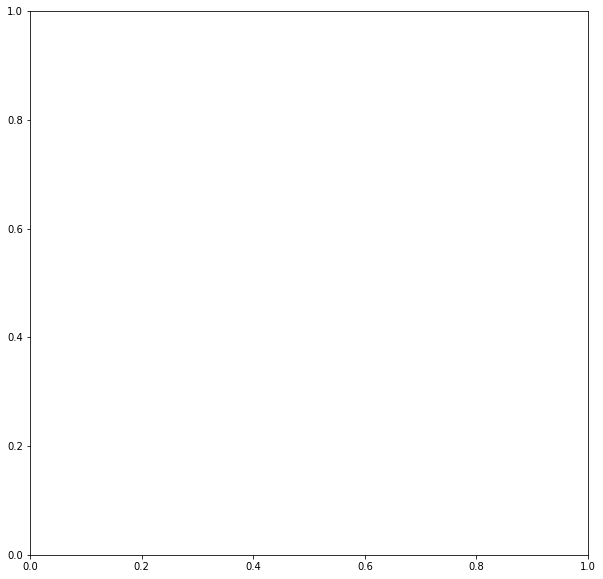

In [3]:
#Creacion de los espectogramas
#Seleccion de los colores y el tamaño de los epectogramas
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(10,10))
# Etiquetas de personas a las que pertenecen los audios
# Utilizar pandas.
PruebaDataset=[]
with open('/Users/andre/OneDrive/Escritorio/Biometry_Voice/BiometriaPorVoz-master/dataset/procesado/People.csv') as csvDataFile:#/Users/andre/OneDrive/Escritorio/BiometryVoice/BiometriaPorVoz-master/dataset/procesado/People.csv
    PruebaDataset = csv.reader(csvDataFile)

#PruebaDataset = pd.read_csv('/Users/javier/Desktop/BiometryVoice/People.csv', header=-1, index_col=0)
# Creación de datagramas para cada identificador
    for a in PruebaDataset:#Recorremos el CSV, siendo a cada id
        #pathlib.Path(f'Data/{a}').mkdir(parents=True, exist_ok=True)#Por Cada Id, creamos carpeta con su nombre dentro de la carpeta recien creada "Data" --> https://stackoverflow.com/questions/600268/mkdir-p-functionality-in-python
        pathlib.Path(f'Data2/{a}').mkdir(parents=True, exist_ok=True)#Por Cada Id, creamos carpeta con su nombre dentro de la carpeta recien creada "Data" --> https://stackoverflow.com/questions/600268/mkdir-p-functionality-in-python  
        for root, dirs, files in os.walk(f'./DatasetTest/{a}'):#Recorremos carpeta donde estan todos los wav
            for file in files:#Filtramos solo por Files
                if file.endswith(".wav"):#Filtramos solo aquellos que tengan .wav
                    songname = f'./DatasetTest/{a}/{file}'#Guardamos el nombre de la cancion
                    #print('Audio: %s' % songname)
                    y, sr = librosa.load(songname, mono=True, duration=5)#Realizamos Datagramas
                    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=2008, cmap=cmap, sides='default', mode='default', scale='dB');
                    plt.axis('off');
                    plt.savefig(f'Data2/{a}/{file[:-3].replace(".", "")}.png')#Guardamos en Data/Idxxxxx, cambiamos el punto por nada
                    plt.clf()#plt.clf() solo borrará la figura. Todavía puedes pintar otra trama sobre ella. --> https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf

In [ ]:
# Creación de las cabeceras para los datos de las caracteristicas de cada espectograma
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'

for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
# Creación del dataset de caracteristicas y extracción de las mismas
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)#Inicializamos el Writer
    writer.writerow(header)#Escribimos en la primera fila las columnas
# Utilizar pandas.
PruebaDataset=[]
with open('/Users/andre/OneDrive/Escritorio/Biometry_Voice/BiometriaPorVoz-master/dataset/procesado/People.csv') as csvDataFile:
    PruebaDataset = csv.reader(csvDataFile)
    for a in PruebaDataset:#a es cada id del CSV
       for filename in os.listdir(f'./DatasetTest/{a}'):#Me va a recopilar todos los Wavs de cada id
            if filename.endswith(".wav"):
                songname = f'./DatasetTest/{a}/{filename}'
                y, sr = librosa.load(songname, mono=True, duration=30)
                chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) # Calcular un crograma a partir de una forma de onda o espectrograma de potencia
                spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr) # Calcular centroide epectral
                spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr) # Calcular el ancho de banda espectral
                rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr) # La frecuencia de roll-off se define para cada trama como la frecuencia central para un bin de espectrograma de tal forma que al menos roll_percent
                rmse = librosa.feature.rms(y=y) # Calcular el valor de la raíz-media-cuadrado (RMS) para cada fotograma, ya sea de las muestras de audio y o de un espectrograma S.
                zcr = librosa.feature.zero_crossing_rate(y) # Calcular la velocidad de cruce cero de una serie temporal de audio.
                mfcc = librosa.feature.mfcc(y=y, sr=sr) # Coeficientes cepstrales de frecuencia mel (MFCC)
                to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'      
                for e in mfcc:
                    to_append += f' {np.mean(e)}'
                to_append += f' {a}'
                file = open('data.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())

In [ ]:
data = pd.read_csv('data.csv')
data.head()

In [ ]:
data.shape